In [7]:
import numpy as np
import networkx as nx

from castle.algorithms import PC
from castle.common.priori_knowledge import PrioriKnowledge

from castle.datasets import IIDSimulation 
from castle.common import GraphDAG

import matplotlib.pyplot as plt

# Expert knowledge in causal discovery

## Data

In [3]:
# Create a graph
dag = np.array([
    [0, 1, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0]
])

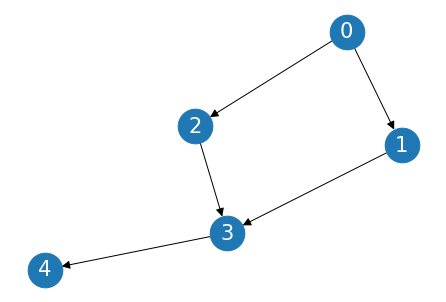

In [11]:
# Plot the causal graph
plt.figure(figsize=(6, 4))
nx.draw(
    G=nx.DiGraph(dag),
    node_size=1200,
    arrowsize=17,
    with_labels=True,
    font_color='white',
    font_size=21,
)

In [12]:
# Generate teh data
data = IIDSimulation(
    W=dag, 
    n=1000, 
    method='linear', 
    sem_type='gauss'
)

2023-03-31 10:03:41,720 - C:\Users\aleks\anaconda3\envs\causal_book_py38\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


## Model

In [15]:
# Train the causal discovery model
pc = PC(variant='stable')

# Learn
pc.learn(data.X)

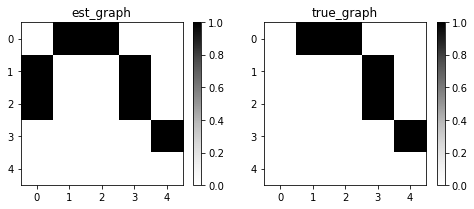

In [16]:
# Results
GraphDAG(
    est_dag=pc.causal_matrix, 
    true_dag=dag)

plt.show()

## Add expert knowledge

In [31]:
# Instantiate and encode priori knowledge
priori_knowledge = PrioriKnowledge(n_nodes=5)

# Add required & forbidden edges
priori_knowledge.add_forbidden_edges([(2, 0), (1, 0)])

In [32]:
# Train the causal discovery model
pc = PC(variant='stable', priori_knowledge=priori_knowledge)

# Learn
pc.learn(data.X)

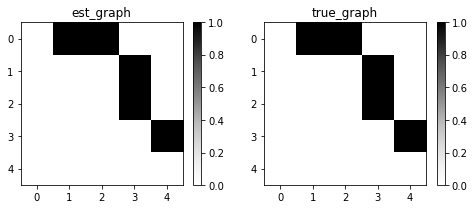

In [33]:
# Results
GraphDAG(
    est_dag=pc.causal_matrix, 
    true_dag=dag)

plt.show()